<a href="https://colab.research.google.com/github/haseena-hassan/Women-Hackathon-Residential-Camp/blob/master/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

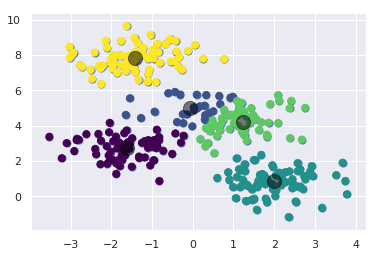

In [1]:
"""
Created on Sun Aug 25 09:38:15 2019

@author: haseena
"""
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.75, random_state=0)
#n_samples : int, optional (default=100)
#centers : int or array of shape [n_centers, n_features].The number of centers to generate, or the fixed center locations.
#cluster_std : float or sequence of floats, optional (default=1.0). The standard deviation of the clusters.
#random_state : int, RandomState instance or None (default)
#Determines random number generation for dataset creation. 
plt.scatter(X[:, 0], X[:, 1], s=50);

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

#y_kmeans ennal center points when X given as input i.e 300 data values belong to any of 5 clusters
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#s means plot cheyyunna area
#cmap= viridis, plasma,inferno,magma

#5 cluster valuesinte centres aaan 'centers'
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

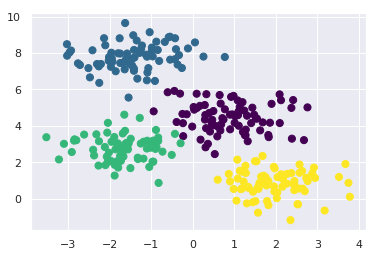

In [2]:
"""
Created on Thu Aug 29 16:12:02 2019

@author: haseena
"""

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    #we need to find certain points as centroids
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points : step where centre is updated
        new_centers = np.array([ X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');